In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn

df = pd.read_csv("final_linear_regression_dataset_updated_v2.csv")
pixelValues = df["pixel_count"]
percentile20 = np.percentile(pixelValues, 20)
percentile80 = np.percentile(pixelValues, 80)
percentile15 = np.percentile(pixelValues, 15)
percentile85 = np.percentile(pixelValues, 85)
percentile10 = np.percentile(pixelValues, 10)
percentile90 = np.percentile(pixelValues, 90)
print("20th percentile: " + str(percentile20))
print("80th percentile: " + str(percentile80))
print("15th percentile: " + str(percentile15))
print("85th percentile: " + str(percentile85))
print("10th percentile: " + str(percentile10))
print("90th percentile: " + str(percentile90))

20th percentile: 23291.4
80th percentile: 79736.4
15th percentile: 21575.25
85th percentile: 88313.4
10th percentile: 19037.4
90th percentile: 110967.30000000009


In [2]:
# Remove the values from the bottom and top 10% from dataset
df = df[ df['pixel_count'] > percentile10]
df = df[ df['pixel_count'] < percentile90]
print(df)
df.to_csv("percentile_10_removed.csv", index=False)

     pixel_count  mounting_configuration   power
0          30897                       2  218.62
1          30300                       2  183.60
2          26019                       2  128.52
3          26622                       2  136.00
4          36720                       2  193.46
..           ...                     ...     ...
366        30234                       1   47.84
368        84750                       1  168.03
369        59004                       1  272.06
370        60723                       1  233.70
371        35940                       1  247.80

[296 rows x 3 columns]


In [3]:
inputValues = df.values[:, 0:2] 
outputValue = df.values[:, 2] 

# Create 3 folds
kf = KFold(n_splits=3, random_state=None, shuffle=False)

score = sklearn.model_selection.cross_validate(sklearn.linear_model.LinearRegression(), inputValues, outputValue, scoring=["r2", "neg_mean_absolute_error", "neg_mean_squared_error"], cv= kf)
print(score)


{'fit_time': array([0.02970076, 0.00099874, 0.00199413]), 'score_time': array([0.00199437, 0.00099659, 0.0009973 ]), 'test_r2': array([0.20354701, 0.47774292, 0.37123724]), 'test_neg_mean_absolute_error': array([ -92.62853872,  -69.18205253, -120.39079696]), 'test_neg_mean_squared_error': array([-26656.68823695,  -8364.8146248 , -37706.96024776])}


Feature: 0, Score: 64.77706
Feature: 1, Score: 17.97943


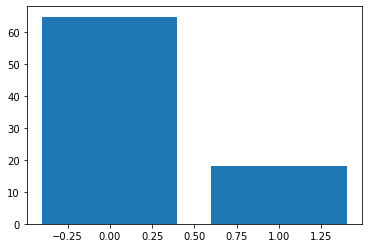

In [4]:
# Feature importance
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=300, n_features=2, n_informative=2, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

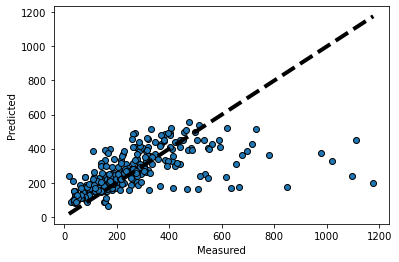

296


In [5]:
predicted = sklearn.model_selection.cross_val_predict(sklearn.linear_model.LinearRegression(), inputValues, outputValue, cv=kf)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(outputValue, predicted, edgecolors=(0, 0, 0))
ax.plot([outputValue.min(), outputValue.max()], [outputValue.min(), outputValue.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print(len(predicted))

In [36]:
predictedDf = pd.DataFrame(predicted)
predictedDf.to_csv("predicted_values.csv", index=False)

In [38]:
ordinaryLeastSquaresModel = sklearn.linear_model.LinearRegression()
ordinaryLeastSquaresModel.fit(inputValues, outputValue)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

LinearRegression(normalize=True)

In [39]:
coef = ordinaryLeastSquaresModel.coef_
intercept = ordinaryLeastSquaresModel.intercept_
print('coef= ', coef)
print('intercept= ', intercept)

coef=  [4.79658999e-03 9.44964692e+01]
intercept=  -130.79650289810746


In [40]:
predictedPower = pd.DataFrame(ordinaryLeastSquaresModel.predict(inputValues), columns=['Predicted Power']) 
actualPower = pd.DataFrame(outputValue, columns=['Actual Power'])
actualPower = actualPower.reset_index(drop=True)
df_actual_vs_predicted = pd.concat([actualPower,predictedPower],axis =1)
df_actual_vs_predicted = df_actual_vs_predicted.T


In [41]:
df_actual_vs_predicted.to_csv("sctual_vs_predicted.csv", index=False)

In [42]:
df_actual_vs_predicted.T

,Actual Power,Predicted Power
0,218.62,206.396676
1,183.60,203.533112
2,128.52,182.998910
3,136.00,185.891254
4,193.46,234.327220
...,...,...
270,47.84,108.720068
271,168.03,370.210968
272,272.06,246.717962
273,233.70,254.963300


In [43]:
df_actual_vs_predicted.T.to_csv("sctual_vs_predicted_v2.csv", index=False)